# Image segmentation using K-means clustering

Data Analysis Project, SS2022 <br>

*Topic 01:* Biomedical Image Analysis <br>

*Group 05:* Cedric Leonhard Marquard, Emily Locke, Melissa Ringeis, Gabriel Tulcan <br>

*Supervisor:* PD Dr. Karl Rohr, Christian Ritter <br>

*Tutor:* Marie Becker
<br>
<br>
<br>

# Abstract

K-Means is a common tool used for image segmentation. It is based on an unsupervised algorithm that identifies clusters in the data based on how similar the data is. When applying K-Means on images, the algorithm treats each pixel as a feature point having a location in space which is determined by either its intensity values or coordinates. 

In this project, a K-Means image segmentation algorithm was programmed from scratch and then applied on coloured as well as grayscale images.
The coloured images were converted into different colour spaces, such as HSV, LAB and YCbCr, in order to evaluate the influence different colour models might have on the quality of the clustering. Furthermore, various pre-processing methods were performed to enhance relevant image features. Additionally, different distance metrics were applied to analyse their impact on clustering results and the algorithm's runtime. <br>
To evaluate the performance of the K-Means algorithm quantitatively, the Dice Score was calculated by comparing the output images with manually generated ground truth images.

Overall, the algorithm led to good results and high Dice Scores up to 96 %. However, especially the grayscale images presented some challenges. Clustering was often impaired by reflections caused by the microscope. This problem was overcome by removing bright spots before starting the segmentation.

An improvement of the algorithm might be the implementation of Soft K-Means. In that way, pixels can belong to more than one cluster. This could correct the assignment of pixels that are located near the borders between two clusters, such as the cells' edges. 
<br>
<br>
<br>

# Table of contents

- [1. Introduction](#1-introduction) 
- [2. Material](#2-material)
    - [2.1 Imports](#21-imports)
    - [2.2 Raw Data](#22-raw-data)
    - [2.3 Software](#23-software)
- [3. Methods](#3-methods)
    - [3.1 K-Means Clustering](#31-k-means-clustering)
    - [3.2 Colour Space Conversion](#32-colour-space-conversion)
    - [3.3 Pre-processing](#33-pre-processing)
        - [3.3.1 Filtering](#331-filtering)
        - [3.3.2 Bright Spots](#332-bright-spots)
    - [3.4 Morphological Operations](#34-morphological-operations)
    - [3.5 Dice Score](#35-dice-score)
- [4. Results](#4-results)
    - [4.1 K-Means](#41-k-means)
    - [4.2 Colour spaces](#42-colour-spaces)
    - [4.3 Pre-processing](#43-preprocessing)
    - [4.4 Distances](#44-distances)
    - [4.5 Position](#45-position)
    - [4.6 Combinations](#46-combinations)
    - [4.7 Grayscale images](#47-grayscale-images)
        - [4.7.1 NIH3T3 fibroblasts](#471-nih3t3-fibroblasts)
        - [4.7.2 BBBC images](#472-bbbc-images)
    - [4.8 Comparison with OpenCV K-Means function](#48-comparison-with-opencv-k-means-function)
    - [4.9 Comparison with Otsu Thresholding](#49-comparison-with-otsu-thresholding)
- [5. Discussion and Conclusion](#5-discussion-and-conclusion)
- [6. Appendix](#6-appendix)
- [7. Bibliography](#7-bibliography)
<br>
<br>


# 1. Introduction


Image segmentation describes the division of an image into different regions based on several features (Udupa and Samarasekera, 1996).  It is a tool to structure the objects represented in the image data by using algorithms like K-Means. The goal is to change the representation of an image so that it is easier to analyse, making it possible to locate objects and create boundaries. Therefore, segmentation methods are very useful in various applications like medical imaging, autonomous driving and customer- or cell segmentation. <br>

Clustering, also known as unsupervised learning, is based on high similarity within clusters and dissimilarity between the clusters. For image segmentation, K-Means is most commonly used. Here, the similarity is defined by distance metrics such as the Euclidean or Manhattan distance. Pixels with similar attributes are grouped together, that is pixels with similar intensity values or coordinates. <br>

This project's goal was to perform K-Means on different images to get a clear distinction between the cells and the background. Therefore, the number of clusters was set to two. Then, the distance between the pixels and the cluster centers, the so-called centroids, was calculated and each pixel was assigned to the nearest centroid. Based on that, the new cluster centers were calculated and the steps were repeated until the clusters converged to a fixed point or a certain number of iterations was reached. <br>

To analyse the influence of the chosen colour model on the clustering, the coloured images were converted into different colour spaces such as HSV, LAB and YCbCr. For noise reduction and better fundamentals for further analysis, the raw data was transformed by several pre-processing steps. Additionally, the impact of different distance metrics was investigated.  Finally, the quality of the segmentation was evaluated by calculating the Dice Score, using ground truth images.
<br>
<br>
<br>

# 2. Material 

## 2.1 Imports

In order to visualize the results, the self-implemented module 'visualisation' is imported. It uses python packages such as seaborn, pandas and skimage. Because the K-Means algorithm has quite a long runtime, the segmentation has already been performed and the output images have been saved. They are loaded through different methods of the visualisation module.


In [3]:
import visualisation as vs

## 2.2 Raw Data

The colour image data set includes two images. The first image has a size of 1024×1024 pixels and consists of fluorescently labelled Cell Nuclei. The second image has a size of 1200×1200 pixels and shows Yeast Cells. Here, problems in the clustering can be caused by the blurry transitions between the cells and the background. <br>

The chosen grayscale image data set is NIH3T3, which shows mouse embryonic cells stained with Hoechst. The images have a size of 1344x1024 pixels. Challenges presented by this data set are several bright spots, presumably caused by reflections of the microscope.<br> 

Additionally, the “Human HT29 colon-cancer cells” (BBBC008) data set (Carpenter *et al.*, 2006) from the Broad Bioimage Benchmark Collection (BBBC) of the Broad Institute was selected for clustering. The BBBC is a publicly available collection of microscopy images that can be used to test and validate new image-analysis algorithms (Ljosa *et al.*, 2012). The chosen data set consists of 24 grayscale images with a size of 512x512 pixels. <br>  

For the colour image data set Adobe® Photoshop was used in order to create the ground truth images needed for evaluating the clustering method. The ground truth images for the grayscale data sets were already provided.

The coloured images as well as an example image from each grayscale data set can be seen below.
<br>
<br>

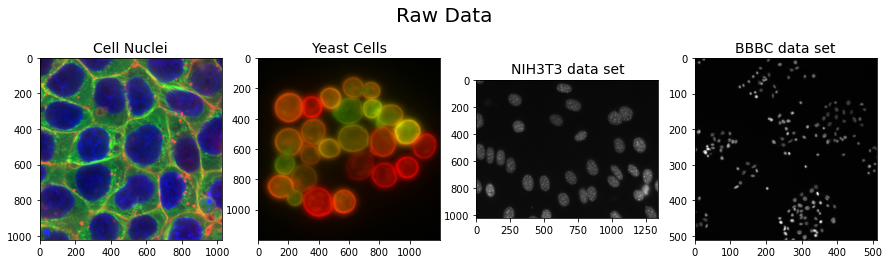

In [4]:
vs.load_data()

## 2.3 Software

The programming language used in this project was Python. The Python interpreter was Visual Studio Code. In order to add image processing capabilities the two following packages were installed: Python Imaging Library from Pillow and OpenCV. Conda was used as package and environment manager.
<br>
<br>
<br>



# 3. Methods

The image below represents an overview of the project and used methods:

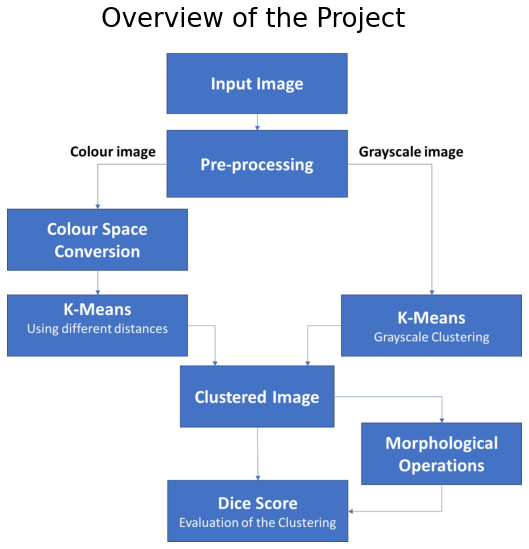

In [5]:
vs.load_project_overview()

## 3.1 K-Means clustering

The K-Means algorithm is a method for grouping N data points in an I dimensional space into K clusters (MacKay, 2003). The algorithm is briefly described in the image below. 
<br>
<br>

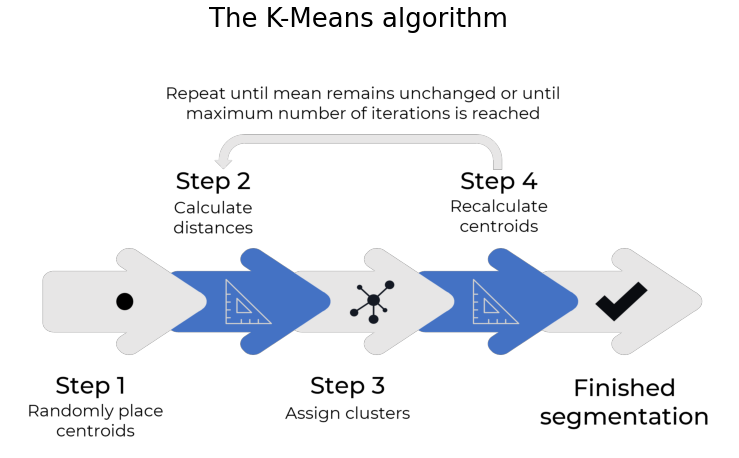

In [6]:
vs.load_kmeans_diagram()

For the K-Means colour clustering algorithm more distance measurements were tested in order to evaluate the impact on the quality of the image segmentation. First, the most common distance metrics known as Minkowski distances were applied: Euclidean, Manhattan and Chebyshev. Additionally, the correlation distance using the Pearson correlation coefficient was used as a different form of distance measurement. For the grayscale images the difference of intensity levels was used as a distance measure.
<br>
<br>

## 3.2 Colour space conversion
The colour space conversion was programmed manually using conversion formulas from RGB to the different colour spaces and functions of the PIL Image package. <br> 

HSV is a colour space defined as a cylindrical coordinate system assembled of hue (H), saturation (S) and brightness value (V). <br>

LAB is a perceptually uniform colour space, which expresses colour as three values: perceptual lightness (L), red/green (A) and yellow/blue (B) (Bora *et al.*, 2015). The formula for the D65 Standard Illuminant was applied. <br>

YCbCr is a colour space assembled of luminance (Y), blue-difference component (Cb) and red-difference component (Cr) (Surhone *et al.*, 2010).

Because the PIL Image package only supports the 8 bit format for the colour values of the various colour spaces, the values have been normalized to this format. 

The Cell Nuclei image as well as the Yeast Cell image converted into different colour spaces can be seen below.
<br>
<br>

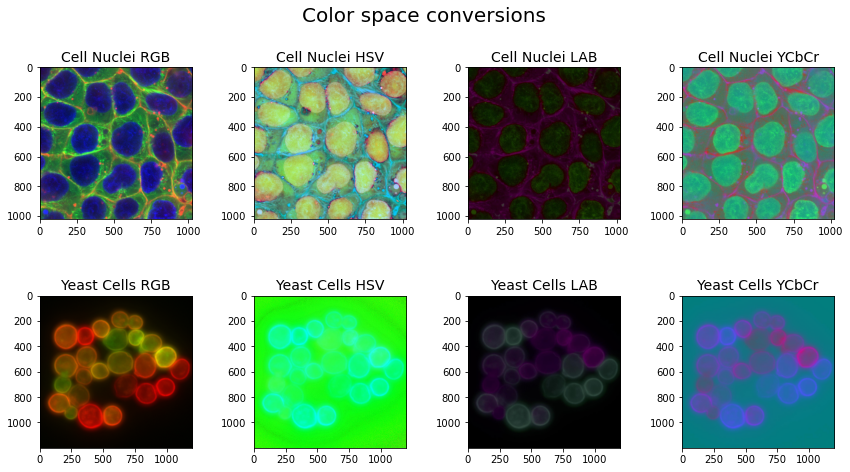

In [7]:
vs.load_colorspaces()

## 3.3 Pre-processing

Pre-processing was applied in order to improve the quality of the data. The final goal is to reduce noise, suppress undesired distortions and enhance the important features.
<br>

### 3.3.1 Filtering

Different filters were used to compare their outputs and evaluate which one works best. For each filter other than bright spots pre-implemented functions of the PIL Image package were used.
<br>

#### Median filter

The median filter is a non-linear filter which is mostly used to reduce impulsive noise like salt and pepper noise. It runs over the image and replaces each pixel with the median of the intensity values of the neighbourhood. This filter was only applied on the grayscale images (Ramani *et al.*, 2013).
<br>

#### Gaussian filter

The Gaussian filter is often used before performing edge detection to remove edges caused by noise. It is an image-blurring filter that determines the transformation to be applied to each pixel in the picture by using a Gaussian function (Shapiro and Stockman, 2001).
<br>

#### Edge enhancement

As cell images often consist of structures which can’t be assigned clearly, edge enhancement is a useful tool to visualize important structures.
This is obtained by using a filter mask which increases the contrast of the pixels around the edges of interest, leading to a higher output at the edges compared to the surroundings (Chaira, 2012).
<br>

#### Sharpened
 
A sharpening filter makes the transition between the various regions present in an image more obvious rather than being smooth.
As an image passes through a sharpening filter the brighter pixels are boosted as relative to its neighbours (Singh).
<br>
<br>

### 3.3.2 Bright spots
In order to improve the segmentation of the grayscale images, a function has been created to remove the bright spots caused by reflections of the microscope. This was done so by selecting a threshold and setting higher intensity values to an intensity value similar to the background. 
<br>
<br>


## 3.4 Morphological operations

Morphological operations describe the image processing based on special structure elements. They are used to improve the output data of image segmentation by closing holes or reducing noise. The following operations were implemented: Dilation, Erosion, Closing and Opening, using different kernel sizes. The functions for the morphological operations were imported from the OpenCV package. 
<br>
<br>

## 3.5 Dice score

The Dice Score is used to evaluate the performance of the segmentation algorithm by comparing the output data to the respective ground truth images. It is calculated using the following formula:
<br>
<br>
$$
Dice = \frac{2TP}{2TP+FP+FN}
$$
<br>
<br>
True positives are the pixels that were assigned to the correct cluster. False positives however, are pixels that were falsely assigned to the cluster, whereas false negatives were not detected as part of the right cluster. The Dice Score ranges between 0 and 1, with 0 meaning there is no similarity at all between the images and 1 meaning they are identical. 
<br>
<br>
<br>

# 4. Results




## 4.1 K-Means

For each image the number of centroids was set to two and the maximum of iterations to 30. Different pre-processing steps, colour spaces and distances were applied on the data. In the following, every factor will be discussed separately. For clarity and a better overview of the factors, only certain combinations will be shown. The full results can be seen in the [Appendix](#6-appendix).
<br>


## 4.2 Colour spaces

The coloured images have been converted to the HSV, LAB and YCbCr colour spaces using the aforementioned method. The output images were compared with  the conversion functions of the PIL Image and OpenCV packages. For HSV and YCbCr, the conversion was accurate. The LAB conversion resulted in correct colours, but darker colour shades.<br>

The following plot shows the results of K-Means clustering based on the four different colour spaces used. Only unprocessed images clustered using the Euclidean distance are shown in the diagram below. 
It is evident that higher Dice Scores could be achieved when clustering the Cell Nuclei image. The highest result of 96.4 % was obtained by using the RGB colour space. For the Yeast Cells YCbCr worked best. Here, a Dice Score of 88.5 % was achieved. Overall, the results are consistent.
<br>

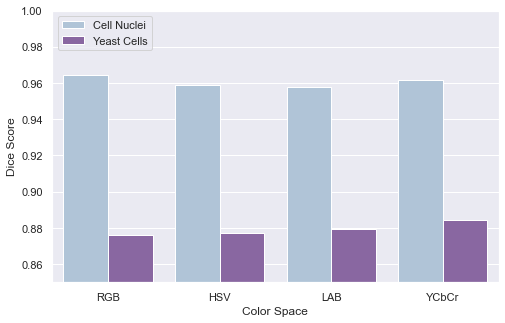

In [8]:
vs.barplot_colorspaces()

## 4.3 Pre-processing

The  barplot below presents  the results of different pre-processing methods in comparison to unprocessed images. Only RGB images which were clustered using the Euclidean distance are shown. <br>

Edge enhancement apparently worsened the output for the Cell Nuclei image, resulting in a Dice Score of just 56 %. All the other values are very similar within a range of 0.7 %. The highest dice score of 96.4 % could be achieved by using the gaussian filter. <br>

The Yeast Cell image could not reach Dice Scores as high as the Cell Nuclei image. The results are quite consistent for all methods with values of 87.6 %, 85.3 %, 87.3 % and 87.6 %, respectively.
<br>

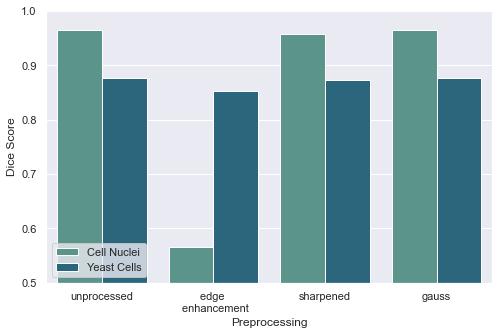

In [9]:
vs.barplot_preprocessing()

## 4.4 Distances

To evaluate the influence of the distance metric, four different distances were compared. Unprocessed RGB images were used.
Regarding the Cell Nuclei image no significant improvements could be obtained. All Dice Scores are within 96.0 % and 96.4 %. 
For the Yeast Cells, the results are also very consistent regarding the Minkowski distances. However, the correlation distance resulted in a remarkably lower Dice Score of only 42.4 %. 
<br>

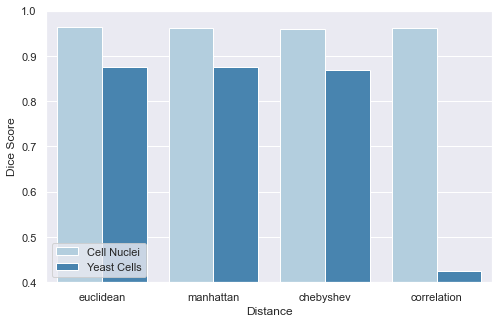

In [10]:
vs.barplot_distances()



### Run-time

For further analysis, the run-time of the K-Means algorithm using different distance metrics was measured. The fastest segmentation was reached with the Chebyshev distance. Both the Manhattan and Euclidean distance were slower, but the algorithm was still able to perform the segmentation within 5 minutes per loop. However, the correlation distance produced a significantly higher runtime of around 2 hours per loop. The slowest run took almost 50 times longer than the fastest which resulted in a standard deviation of 4 hours and 28 minutes.

The output of the '%timeit' function for the different distance metrics can be seen below.


*Euclidean:* <br>
4min 27s ± 1min 40s per loop (mean ± std. dev. of 7 runs, 1 loop each)

*Manhattan:* <br>
3min ± 42.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

*Chebyshev:* <br>
2min 25s ± 40.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

*Correlation:* <br>
The slowest run took 46.91 times longer than the fastest. 2h 14min 7s ± 4h 28min per loop (mean ± std. dev. of 7 runs, 1 loop each)
<br>
<br>

## 4.5 Position

The feature space was expanded using the position of the image pixels. Thus, the K-Means algorithm operated on a five dimensional space consisting of the coordinates and the colour values. Because the position values have a much bigger range (from 0 to 1023 or 1199 respectively) than the RGB values (0 to 255), the data has been normalized. <br>

However, using the position as an additional feature deteriorated the results significantly. As shown in the image below, the algorithm was unable to detect the difference between foreground and background and rather just clustered the pixels depending on whether they are closer to one centroid or the other. <br>

When the position was only weighted 10 %, the results were good with a Dice Score of 96 % for the Cell Nuclei image. This shows that taking the position into account does not improve clustering.
<br>

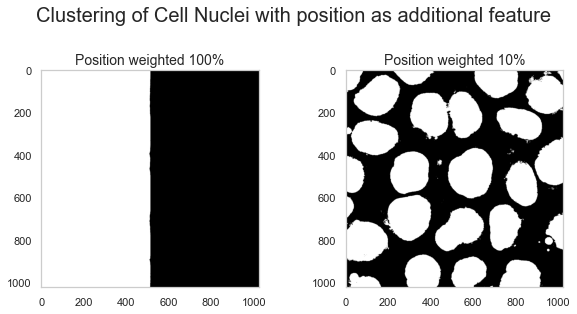

In [11]:
vs.position_images()

## 4.6 Combinations

We tried out various combinations of pre-processing steps, colour spaces and distances to evaluate which methods are working best on the respective data. The full results can be seen in the **Table A1** of the [Appendix](#6-appendix).

For the Yeast Cell image the unprocessed image in the YCbCr colour space and applying the Manhattan distance was revealed as the best combination. A Dice Score of 88.6 % could be reached. However, this combination only produces a better Dice Score of around 0.15 % than the second best combination and the values are all quite similar in general. <br>

For the Cell Nuclei image the best combination seems to be using the image in an RGB colour space and applying the Euclidean metric as well as the gaussian filter. This combination produced a Dice Score of 96.4 %. But, just as with the Yeast Cells, the gap between the highest Dice Score and the Dice Scores of other combinations is very small, only consisting of 0.11 %. <br>

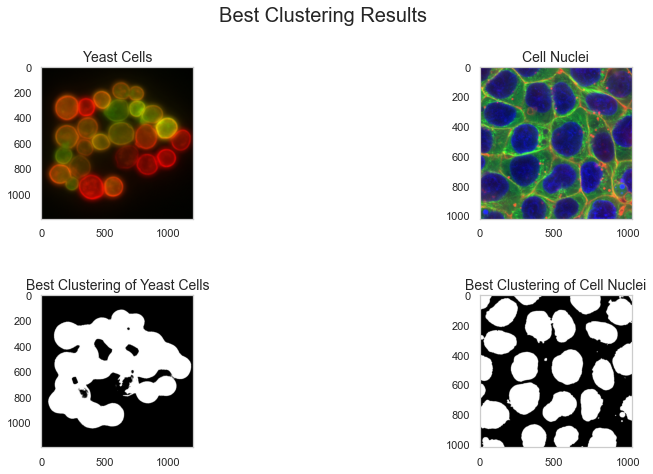

In [12]:
vs.load_best_combinations()

<br>


## 4.7 Grayscale images


## 4.7.1 NIH3T3 fibroblasts

Pre-processing using filters from the PIL package could not improve the results of the grayscale images. The  median filter showed a large degree of variation whereas edge enhancement was more consistent except for two outliers. The results are shown in the boxplot below.
<br>

### Morphological operations 

To improve the clustered images morphological operations were applied. The kernel sizes 3x3, 5x5, 10x10, 15x15, 20x20 and 25x25 were implemented.
For the coloured images the methods Dilation, Erosion, Closing and Opening were used. However, none of them could improve the Dice Score. Hence, they will not be shown and discussed further.

Due to time constraints provoked by the size of the large NIH3T3 data set, only Erosion and Dilation were applied. As Erosion had no positive effect on the output it is not shown in the results. In contrast, Dilation could significantly improve the Dice Scores. Dilation mostly worked best with a kernel size of 10x10 or 25x25. The full results can be seen in the **Table A2** of the [Appendix](#6-appendix).
<br>
<br>

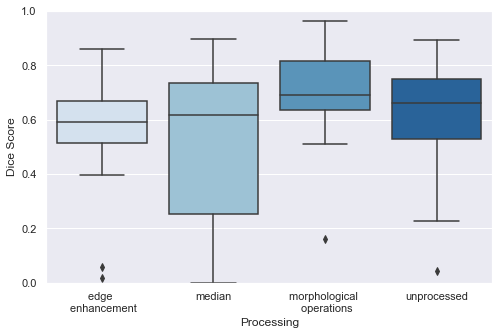

In [13]:
vs.boxplot_grayscale()

<br>

### Bright spots

The removal of bright spots using the aforementioned method improved the Dice Score significantly. For instance, clustering of the unprocessed image number 32 could only achieve a Dice Score of 4.2 %. However, a Dice Score of 63.2 % could be reached after removing the bright spots. Results for this particular image can be seen below.
<br>


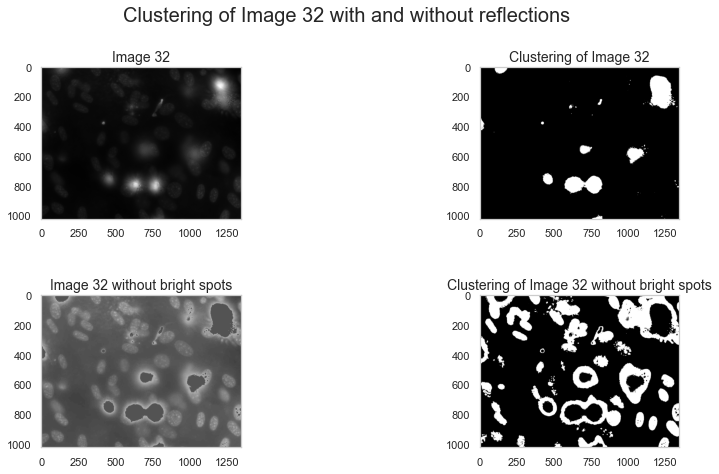

In [14]:
vs.load_reflections()

<br>
This method was applied on images with dice scores below 50 % and led to substantial improvement of the clustering, as shown in the plot below.

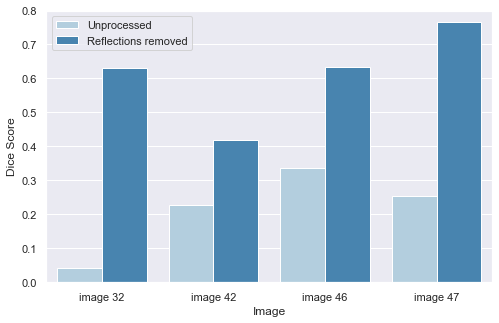

In [15]:
vs.barplot_reflections()

<br>

## 4.7.2 BBBC images

To confirm the functionality of the algorithm, it was applied on a data set consisting of grayscale images from the Broad Bioimage Benchmark Collection. Here, the median filter led to a fractionally higher median Dice Score compared to the unprocessed results, as seen in the boxplot below. Edge enhancement worsened the results significantly. In addition, the Dice Scores of edge enhanced images spread widely, indicating that this pre-processing method leads to an inconsistency of the algorithm’s performance.<br>
Overall, relatively high Dice Scores could be obtained with the unprocessed pictures which confirms the algorithm’s efficiency and functionality. 
The full results can be seen in the **Table A3** of the [Appendix](#6-appendix).
<br>

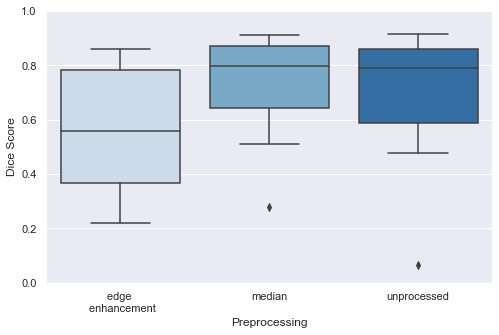

In [16]:
vs.boxplot_BBBC()

<br>

## 4.8 Comparison with the OpenCV K-Means function

The two coloured images and the grayscale images which produced the best and worst Dice Scores with our algorithm (dna-0.png and dna-32.png) are compared with the Dice Scores of the OpenCV K-Means clustering algorithm in **Table 1**.
<br>
<br>

**Table 1**: Comparison of the Dice Scores between our algorithm and the OpenCV algorithm.

| Comparison to OpenCV Package        |               |                  |
|-------------------------------------|---------------|------------------|
|                                     | Our algorithm | OpenCV algorithm |
| Cell Nuclei RGB no filter euclidean | 0.964148982   | 0.964651049      |
| Yeast Cells RGB no filter euclidean | 0.876158369   | 0.872302889      |
| Dna-0.png no filter                 | 0.894378322   | 0.848566738      |
| Dna-32.png no filter                | 0.042206968   | 0.026194714      |

<br>
The OpenCV package shows similar Dice Scores for the coloured images but lower Dice Scores for the grayscale images.
<br>
<br>

## 4.9 Comparison with Otsu Thresholding

To evaluate which segmentation method works best, our results were compared to those of Group 04, who performed Otsu Thresholding on grayscale images. Since both groups used different pre-processing methods and packages, only the results for the unprocessed images of the NIH3T3 data set will be compared. The median value is similar for both K-Means clustering and Otsu Thresholding, but the interquartile range of the Otsu Thresholding is larger than the one for the K-Means clustering. This means that the results are more negatively-skewed for the Otsu Thresholding, indicating slightly lower Dice Scores for some images than those of K-Means clustering. 
<br>
<br>
<br>



# 5. Discussion and Conclusion

In this project different methods were proposed to optimize the segmentation of coloured as well as grayscale images using the K-Means algorithm. The results of the clustering were then evaluated by calculating Dice Scores. The ground truth data for the coloured images was created manually. Hence, the true positions of the cells could not be defined exactly. Especially the edges of cells or cell nuclei could not be assigned clearly. Therefore, the evaluation with the Dice Score was prone to errors. <br>

The Cell Nuclei coloured image was clustered almost perfectly by the algorithm, leading to very high Dice Scores. A nearly perfect Dice Score might have been achieved if the ground truth images were no source of error. An explanation for these excellent results is the fact that the image consists of only three colours and the Cell Nuclei have a very different colour compared to the background. <br>

The Yeast Cells led to significantly lower but still satisfactory Dice Scores. This is because the transitions from cells to background are very blurry, making the cells “glow”. The clustering algorithm detected the blurrs as cells because they have a remarkably different colour compared to the dark background. In the ground truth images however, the blurrs are not counted as cells. Furthermore, some cells are quite dark, making it difficult for the algorithm to distinguish them from the background. This led to holes in the cells as they were falsely assigned. Therefore, the clustering of the Yeast Cells could not achieve results as good as the Cell Nuclei clustering. <br>

Pre-processing did not improve Dice Scores on coloured images. The input data seemed rather ideal and processed by a computer. Here, the cells already were very detailed and sharp with almost no noise or reflections. Especially, edge enhancement did not work well on the Cell Nuclei image. It seems as though because there are no homogenous regions in the image, the filter did not only enhance the contrast between pixels at the edges of the Cell Nuclei, but rather in the whole image, particularly enhancing the edges of the cytoplasm. This led to a kind of salt and pepper noise which corrupted the segmentation.  This was not expected, because these filters should have improved the clustering by making the transitions between cells and background less blurry and thus, the different areas could have been more accurately clustered. <br>

The conversion to different colour spaces did not lead to significantly different results. The LAB conversion was not completely accurate because some values were negative and probably not supported by the .putdata() function of the PIL Image package. Nevertheless, the LAB images produced results of the same quality as the other colour spaces. LAB might have resulted in better Dice Scores if the conversion was a 100 % accurate. The small difference indicates that all the implemented colour spaces are appropriate for an image segmentation using K-Means. <br>

The Minkowski distances led to very similar results when applied to coloured images, whereas the Correlation distance led to equal results for the Cell Nuclei, but worse results for the Yeast Cells. Moreover, the run-time for all the distances differed significantly, with the Chebyshev distance being the fastest (2min 25s ± 40.9 s per loop) and the Correlation distance being by far the slowest with a runtime of 2h 14min 7s ± 4h 28min per loop. This could be because the Chebyshev formula is quite simple (only a substraction), whereas for the Correlation distance the Pearson Correlation Coefficient needs to be calculated. <br>

The overall very similar results between colour spaces and metric distances could be explained by the fact that the K-Means algorithm was run for 30 iterations. The correct centroids for every cluster could be reached for almost every combination after such a high number of iterations. Since the combinations produced generally very similar Dice Scores and the combinations that led to the best results were not consistent for the two coloured images, no “perfect recipe” for clustering could be determined. This also means that the algorithm works well with all the different factors and does not “prefer” a particular colour space or distance. <br>

As the segmentation of the coloured images led to very high Dice Scores, morphological operations could not further improve them. However, the operation Dilation worked really well for the grayscale images of the NIH3T3 data set. Their dilation could increase the Dice Score up to 15 %. Since the NIH3T3 data set often contains cells with dark insides and dark cell borders, the K-Means algorithm might have mistakenly clustered the dark insides of cells and parts of the cell borders as background and thus, led to holes and unclear boundaries. This could be an explanation for the significant improvement of the Dice Scores after using Dilation. <br>

One of the biggest challenges of the NIH3T3 data set were also the reflections that can be found in various images. Because of the high intensity of such bright spots, the algorithm assigns the reflections to one cluster and the much darker cells together with the black background to another cluster. This led to very different Dice Scores for the grayscale images, depending on the existence and number of reflections. After the removal of the bright spots the Dice Scores improved significantly, leading to similar results compared to the Dice Scores achieved by using Otsu Tresholding. <br>

Using the position as an additional feature did not improve the segmentation of the image. Rather, it led to inefficient clustering. Clearly, the algorithm assigns the pixels to the closest centroid which results in an image with one half black and one half white, according to the position of the centroids. As we are only looking for the two clusters cells and background, taking the position into account is not constructive because whether a pixel belongs to a cell or not rather depends on its colour value than on its position. However, using the position as an additional feature might improve clustering when counting cells instead of just distinguishing foreground from background. In that case, the position could help filling holes in cells or assigning the cell’s border correctly. Nevertheless, for this project’s goal of segmenting cells and background the position as an additional feature impairs the algorithm’s performance. <br>

In conclusion, our K-Means algorithm could successfully cluster both coloured and grayscale images and managed to provide satisfactory results that were very similar to those of the OpenCV package and slightly better than the respective results of the Otsu Tresholding. Further improvement of the algorithm could be reached by implementing Soft K-Means, that is adding a stiffness parameter. In this way, pixels can belong to multiple clusters because their proximity to the cluster borders is acknowledged. This might improve segmentation of pixels that lie on the cell's edges because the neighbouring clusters are also taken into account. 

<br>
<br>
<br>







# 6. Appendix

<br>
**Table A1**: Dice Scores of the coloured images after applying different combinations of pre-processing, colour spaces and distances.

| Dice Scores for coloured images|            |             |                  |              |             |
|--------------------------------|------------|-------------|------------------|--------------|-------------|
| **Cell Nuclei**                |            |             |                  |              |             |
|                                |            | No filter   | Edge Enhancement | Gauss Filter | Sharpen     |
| RGB                            | Euclidean  | 0.964148982 | 0.564795797      | 0.964335056  | 0.957195367 |
|                                | Manhattan  | 0.961484569 | 0.511770434      | 0.964242717  | 0.952815628 |
|                                | Chebyshev  | 0.960049905 | 0.464421868      | 0.962278516  | 0.957155269 |
| HSV                            | Euclidean  | 0.958861237 | 0.461415965      | 0.959449629  | 0.947257329 |
|                                | Manhattan  | 0.953588146 | 0.331154865      | 0.949555523  | 0.944804662 |
|                                | Chebyshev  | 0.943405132 | 0.419534564      | 0.953575801  | 0.907586264 |
| LAB                            | Euclidean  | 0.95799056  | 0.745738014      | 0.958774722  | 0.954095137 |
|                                | Manhattan  | 0.957379545 | 0.673559656      | 0.958237938  | 0.953843649 |
|                                | Chebyshev  | 0.95203604  | 0.74974138       | 0.955797233  | 0.954764234 |
| YCbCr                          | Euclidean  | 0.961761036 | 0.616671176      | 0.962657612  | 0.956048834 |
|                                | Manhattan  | 0.960592118 | 0.609680889      | 0.962305504  | 0.956238645 |
|                                | Chebyshev  | 0.960024143 | 0.617975453      | 0.961076522  | 0.952784518 |
| **Yeast Cells**                |            |             |                  |              |             |
|                                |            | No filter   | Edge Enhancement | Gauss Filter | Sharpen     |
| RGB                            | Euclidean  | 0.876158369 | 0.852941881      | 0.876222978  | 0.872547647 |
|                                | Manhattan  | 0.875443379 | 0.855215611      | 0.876862427  | 0.874646009 |
|                                | Chebyshev  | 0.869362265 | 0.840076796      | 0.870766927  | 0.867659904 |
| HSV                            | Euclidean  | 0.877310543 | 0.826821173      | 0.878736908  | 0.875087134 |
|                                | Manhattan  | 0.873923271 | 0.832224359      | 0.877067886  | 0.868692292 |
|                                | Chebyshev  | 0.880194074 | 0.831865244      | 0.879879228  | 0.872480154 |
| LAB                            | Euclidean  | 0.879193318 | 0.873538361      | 0.880186165  | 0.879354967 |
|                                | Manhattan  | 0.879835712 | 0.868976374      | 0.880060682  | 0.876936268 |
|                                | Chebyshev  | 0.875327862 | 0.873778318      | 0.871681219  | 0.87717266  |
| YCbCr                          | Euclidean  | 0.884522139 | 0.862186213      | 0.881771797  | 0.880951891 |
|                                | Manhattan  | 0.886068136 | 0.853832591      | 0.885201562  | 0.884968877 |
|                                | Chebyshev  | 0.877552635 | 0.853006584      | 0.880492653  | 0.878234942 |

<br>

**Table A2**: Dice Scores of the grayscale NIH3T3 data set after applying different filters and comparing to the best Dice Scores after performing Morphological Operations (Erosion and Dilation using different kernel sizes).

| Dice Scores for the NIH3T3 data set |             |             |                  |                                                   |                                         |                  |
|------------------------------------|-------------|-------------|------------------|---------------------------------------------------|-----------------------------------------|------------------|
|                                    | No Filter   | Median      | Edge Enhancement | Best Morphological Operation (used for no filter) | Dice Score Best Morphological Operation | Improvement in % |
| dna-0.png                          | 0.894378322 | 0.895196014 | 0.859186582      | Dilation 10x10                                    | 0.963624931                             | 8%               |
| dna-1.png                          | 0.884525272 | 0.885371110 | 0.824904227      | Dilation 10x10                                    | 0.949321147                             | 7%               |
| dna-26.png                         | 0.82483608  | 0.829806908 | 0.669219554      | no improvement                                    |                                         |                  |
| dna-27.png                         | 0.734541727 | 0.736283495 | 0.662926363      | Dilation 10x10                                    | 0.819934981                             | 12%              |
| dna-28.png                         | 0.752856723 | 0           | 0.706629757      | Dilation 10x10                                    | 0.826052827                             | 10%              |
| dna-29.png                         | 0.672810231 | 0.617976668 | 0.623203927      | Dilation 10x10                                    | 0.773680974                             | 15%              |
| dna-30.png                         | 0.646695873 | 0.650677163 | 0.567344655      | Dilation 5x5                                      | 0.698917006                             | 8%               |
| dna-31.png                         | 0.723718663 | 0.725926082 | 0.626337355      | Dilation 10x10                                    | 0.775670859                             | 7%               |
| dna-32.png                         | 0.042206968 | 0.034365389 | 0.058725941      | Dilation 25x25                                    | 0.159728823                             | 278%             |
| dna-33.png                         | 0.53375217  | 0.482404318 | 0.499836662      | Dilation 10x10                                    | 0.615012821                             | 15%              |
| dna-37.png                         | 0.52543850  | 0.496612513 | 0.551620148      | Dilation 20x20                                    | 0.640668543                             | 22%              |
| dna-40.png                         | 0.680536638 | 0.682652557 | 0.576383343      | no improvement                                    |                                         |                  |
| dna-42.png                         | 0.22747751  | 0.000271898 | 0.018333984      | Dilation 25x25                                    | 0.509841856                             | 124%             |
| dna-44.png                         | 0.589037156 | 0.571516839 | 0.579335002      | Dilation 20x20                                    | 0.648845820                             | 10%              |
| dna-45.png                         | 0.628648366 | 0.615701142 | 0.599219793      | Dilation 10x10                                    | 0.636089187                             | 1%               |
| dna-46.png                         | 0.337250643 | 0.152354799 | 0.423918248      | Dilation 25x25                                    | 0.634055470                             | 88%              |
| dna-47.png                         | 0.253191809 | 0.176863650 | 0.396878462      | Dilation 25x25                                    | 0.602168344                             | 138%             |
| dna-49.png                         | 0.796548556 | 0.798094098 | 0.727061477      | no improvement                                    |                                         |                  |

<br>

**Table A3**: Dice Scores of the grayscale images of the BBBC Human Colon Cancer data set after applying different filters.

| BBBC Human Colon Cancer data set|             |             |                  |
|---------------------------------|-------------|-------------|------------------|
|                                 | No Filter   | Median      | Edge Enhancement |
| img0                            | 0.907195587 | 0.903668236 | 0.839741379      |
| img1                            | 0.76386037  | 0.671734937 | 0.455779322      |
| img2                            | 0.866816543 | 0.872516238 | 0.823395982      |
| img3                            | 0.54052775  | 0.594383054 | 0.403189513      |
| img4                            | 0.85067817  | 0.861378222 | 0.823107468      |
| img5                            | 0.573176111 | 0.634873248 | 0.299284279      |
| img6                            | 0.841042255 | 0.841431961 | 0.777452844      |
| img7                            | 0.675552599 | 0.665973378 | 0.375281405      |
| img8                            | 0.913437473 | 0.911713891 | 0.861015724      |
| img9                            | 0.805324376 | 0.806788316 | 0.22345328       |
| img10                           | 0.845998292 | 0.860737066 | 0.782357126      |
| img11                           | 0.58387653  | 0.659412116 | 0.32151575       |
| img12                           | 0.860445338 | 0.874885496 | 0.736675236      |
| img13                           | 0.592275986 | 0.589012432 | 0.446837305      |
| img14                           | 0.862933205 | 0.872957395 | 0.71568361       |
| img15                           | 0.064248082 | 0.278053    | 0.218746187      |
| img16                           | 0.776162421 | 0.786622467 | 0.662413263      |
| img17                           | 0.477472289 | 0.510836801 | 0.365864503      |
| img18                           | 0.831337039 | 0.839777121 | 0.654343073      |
| img19                           | 0.360205832 | 0.299107834 | 0.284577477      |
| img20                           | 0.877923997 | 0.807252255 | 0.807252255      |
| img21                           | 0.522480918 | 0.570549666 | 0.474558054      |
| img22                           | 0.667209354 | 0.704316547 | 0.424226442      |
| img23                           | 0.255758756 | 0.251213185 | 0.249919917      |

<br>
<br>

# 7. Bibliography


Bora, D., Gupta, A., and Khan, F. (2015). Comparing the Performance of L*A*B* and HSV Color Spaces with Respect to Color Image Segmentation. <br><br>
Carpenter, A.E., Jones, T.R., Lamprecht, M.R., Clarke, C., Kang, I.H., Friman, O., Guertin, D.A., Chang, J.H., Lindquist, R.A., Moffat, J., et al. (2006). CellProfiler: image analysis software for identifying and quantifying cell phenotypes. Genome Biol. 7, R100. 10.1186/gb-2006-7-10-r100. <br> <br>
Chaira, T. (2012). A rank ordered filter for medical image edge enhancement and detection using intuitionistic fuzzy set. Applied Soft Computing 12, 1259-1266. https://doi.org/10.1016/j.asoc.2011.12.011. <br> <br>
Ljosa, V., Sokolnicki, K. & Carpenter, A (2012). Annotated high-throughput microscopy image sets for validation. Nat Methods 9, 637  https://doi.org/10.1038/nmeth.2083 <br><br>
MacKay, D.J.C. (2003). Information theory, inference, and learning algorithms (Cambridge University Press). <br> <br>
Ramani, R., Vanitha, S., and Valarmathy, S. (2013). The Pre-Processing Techniques for Breast Cancer Detection in Mammography Images. International Journal of Image, Graphics and Signal Processing 5, 47-54. 10.5815/ijigsp.2013.05.06. <br><br>
Shapiro, L.G., and Stockman, G.C. (2001). Computer Vision (Prentice Hall). <br><br>
Singh, N.P. Sharpening Filters. https://iq.opengenus.org/sharpening-filters/. <br><br>
Surhone, L.M., Timpledon, M.T., and Marseken, S.F. (2010). YCbCr (Betascript Publishing). <br><br>
Udupa, J.K., and Samarasekera, S. (1996). Fuzzy Connectedness and Object Definition: Theory, Algorithms, and Applications in Image Segmentation. Graphical Models and Image Processing 58, 246-261. https://doi.org/10.1006/gmip.1996.0021. <br><br>